In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
!pip install -q pyyaml h5py  # Required to save models in HDF5 format
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# %tensorflow_version 1.x
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing;
import math, time, itertools
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
import h5py
import requests
import os
from sklearn import linear_model;
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pandas_datareader import data
import urllib.request, json
import tensorflow as tf 
import io
import pdb
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
# Company_select='GOOG'
Company_select='FORD MOTOR CO'
ticker_symbol='F'

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:

fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ford_analyst_calls_1.xlsx')  
df4 = pd.read_excel('ford_analyst_calls_1.xlsx')

In [ ]:

fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ford_stock_prices.xlsx')  
df1 = pd.read_excel('ford_stock_prices.xlsx')

In [ ]:
Df3_comp=df4
Df3_comp=Df3_comp.loc[Df3_comp['IBES Ticker Symbol'] == ticker_symbol]
Df3_comp=Df3_comp.loc[Df3_comp['Forecast Period Indicator'] == 6]


Df3_comp=Df3_comp[['Announce Date, SAS Format','Estimate Value']]
Df3_comp=Df3_comp.rename(columns={"Announce Date, SAS Format": "Date","Estimate Value":"Value"})
Df3_comp = Df3_comp.groupby(["Date"], as_index=False, sort= False).mean()

date_val=[]
for k in range(0,Df3_comp.shape[0]):
    date_val.append(((datetime.datetime.strptime(Df3_comp.iloc[k]['Date'], '%d%b%Y').date())))
    Df3_comp.drop(['Date'], axis=1)

Df3_comp["Date"] = date_val
mask = (Df3_comp['Date'] >= Df3_comp.iloc[0,0]) & (Df3_comp['Date'] <= Df3_comp.iloc[-1,0])
Df3_comp = Df3_comp.loc[mask]

In [ ]:
Df1_comp=df1.loc[df1['Company Name'] == Company_select]
Df1_comp = Df1_comp.loc[Df1_comp['Ticker Symbol'] == ticker_symbol]

Df1_comp=Df1_comp[['Data Date - Dividends','Trading Volume - Daily','Price - Close - Daily','Price - High - Daily','Price - Low - Daily','Price - Open - Daily','Current EPS']]
Df1_comp = Df1_comp[Df1_comp['Price - Open - Daily'].notna()]
Df1_comp=Df1_comp.rename(columns={"Data Date - Dividends": "Date","Trading Volume - Daily": "Volume","Price - Close - Daily": "Close","Price - High - Daily": "High","Price - Low - Daily": "Low","Price - Open - Daily": "Open","Current EPS": "Current_EPS"})
date_val=[]
for k in range(0,Df1_comp.shape[0]):
    date_val.append(((datetime.datetime.strptime(Df1_comp.iloc[k]['Date'], '%d%b%Y').date())))
    Df1_comp.drop(['Date'], axis=1)
Df1_comp["Date"] = date_val
Df1_comp['Mid']=(Df1_comp['High']+Df1_comp['Low'])/2
Df1_comp['Date'] = pd.to_datetime(Df1_comp.Date)
Df1_comp.sort_values(by='Date',inplace=True)
Df1_comp.head()

,Date,Volume,Close,High,Low,Open,Current_EPS,Mid
5215,2004-08-27,6334100.0,14.12,14.18,13.98,14.02,1.5,14.080
5216,2004-08-30,3863200.0,13.96,14.09,13.92,14.08,1.5,14.005
5217,2004-08-31,6921200.0,14.11,14.15,13.89,14.05,1.5,14.020
5218,2004-09-01,11151600.0,13.90,14.13,13.86,14.12,1.5,13.995
5219,2004-09-02,10017300.0,14.36,14.40,13.90,13.93,1.5,14.150


In [ ]:
# Df3_comp=df3.loc[df3['Company Name'] == Company_select]
# Df3_comp=Df3_comp.loc[Df3_comp['Official Ticker Symbol'] == ticker_symbol]
# #To choose depending on Forecast Period Indicator
# # fpi_keys_quaterly = [6, 7, 8, 9, 'N','O','P','Q','R','S','T','L','Y']
# # frames = []
# # for i in range(len(fpi_keys_quaterly)):
# #     frames.append(Df3_comp.loc[Df3_comp['Forecast Period Indicator'] == fpi_keys_quaterly[i]])
# # Df3_comp = pd.concat(frames)
# Df3_comp=Df3_comp[['Activation Date, SAS Format','Estimate Value']]
# Df3_comp=Df3_comp.rename(columns={"Activation Date, SAS Format": "Date","Estimate Value":"Value"})
# Df3_comp = Df3_comp.groupby(["Date"], as_index=False, sort= False).mean()

# date_val=[]
# for k in range(0,Df3_comp.shape[0]):
#     date_val.append(((datetime.datetime.strptime(Df3_comp.iloc[k]['Date'], '%d%b%Y').date())))
#     Df3_comp.drop(['Date'], axis=1)
# Df3_comp["Date"] = date_val
# Df3_comp["Date"] = pd.to_datetime(Df3_comp.Date)
# Df3_comp.sort_values(by="Date",inplace=True)
# Df3_comp.tail()

In [ ]:
# Df1_comp=df1.loc[df1['Company Name'] == Company_select]
# Df1_comp = Df1_comp.loc[Df1_comp['Ticker Symbol'] == ticker_symbol]
# Df1_comp=Df1_comp[['Data Date - Dividends','Trading Volume - Daily','Price - Close - Daily','Price - High - Daily','Price - Low - Daily','Price - Open - Daily']]
# Df1_comp = Df1_comp[Df1_comp['Price - Open - Daily'].notna()]
# Df1_comp=Df1_comp.rename(columns={"Data Date - Dividends": "Date","Trading Volume - Daily": "Volume","Price - Close - Daily": "Close","Price - High - Daily": "High","Price - Low - Daily": "Low","Price - Open - Daily": "Open"})
# date_val=[]
# for k in range(0,Df1_comp.shape[0]):
#     date_val.append(((datetime.datetime.strptime(Df1_comp.iloc[k]['Date'], '%d%b%Y').date())))
#     Df1_comp.drop(['Date'], axis=1)
# Df1_comp["Date"] = date_val
# Df1_comp['Date'] = pd.to_datetime(Df1_comp.Date)
# Df1_comp.sort_values(by='Date',inplace=True)
# mask = (Df1_comp['Date'] >= Df4_comp.iloc[0,0]) & (Df1_comp['Date'] <= Df4_comp.iloc[-1,0])
# Df1_comp = Df1_comp.loc[mask]

# Df1_comp['Mid']=(Df1_comp['High']+Df1_comp['Low'])/2
# # Df1_comp['Mean']=(Df1_comp['High']+Df1_comp['Low']+Df1_comp['Close']+Df1_comp['Open'])/4
# # Df1_comp['EMA20']=Df1_comp['Mean'].ewm(span=20, adjust=False).mean()
# # Df1_comp['EMA5']=Df1_comp['Mean'].ewm(span=5, adjust=False).mean()
# # Df1_comp['offset_EMA20']=(Df1_comp['Mean'] - Df1_comp['EMA20'])/Df1_comp['EMA20']*100
# # Df1_comp['offset_EMA5']=(Df1_comp['Mean'] - Df1_comp['EMA5'])/Df1_comp['EMA5']*100
# # Df1_comp['date']=Df1_comp['Date']
# # Df1_comp=Df1_comp.reset_index()
# # Df1_comp=Df1_comp.set_index(['Date'])
# Df1_comp.tail()


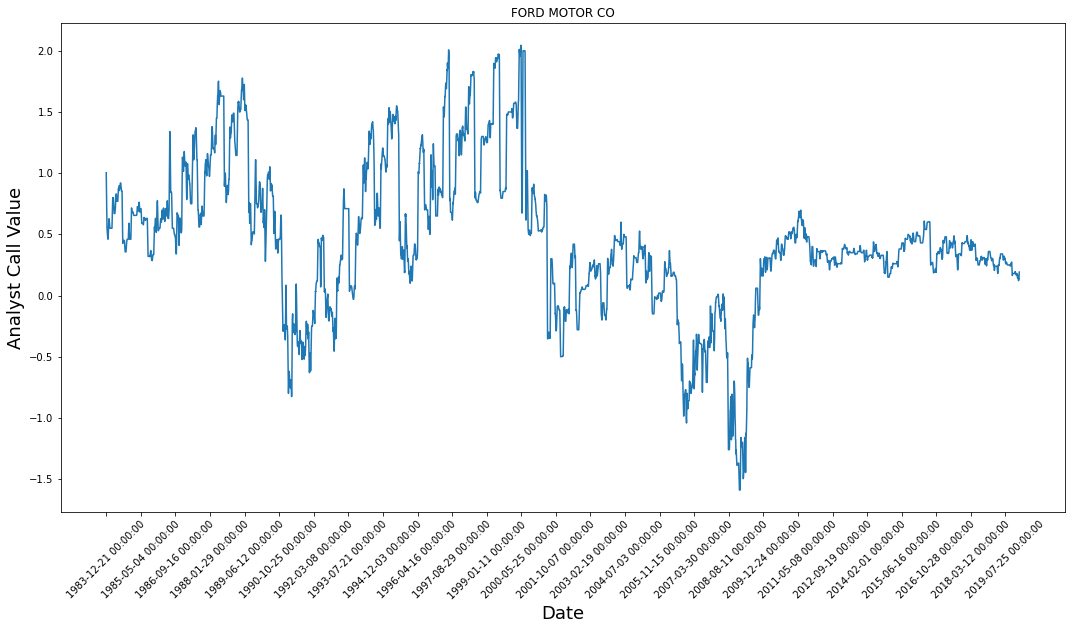

In [ ]:
idx = pd.date_range(Df3_comp.iloc[0,0],Df3_comp.iloc[-1,0])
s = pd.Series(Df3_comp['Value'].to_numpy(),index=Df3_comp['Date'])
s.index = pd.DatetimeIndex(s.index)
s = s.reindex(idx)
# s = s.interpolate()
s = s.fillna(method='ffill')
s = s.rolling(window=10).mean()
s = s.dropna()

analyst_call = np.array([s.index, s.values]).T
n = analyst_call.shape[0]
p = analyst_call.shape[1]
plt.figure(figsize = (18,9))
plt.plot(range(analyst_call.shape[0]),analyst_call[:,1])
plt.xticks(range(0,analyst_call.shape[0],500),analyst_call[range(0,analyst_call.shape[0],500),0],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Analyst Call Value',fontsize=18)
plt.title(Company_select)
plt.show()



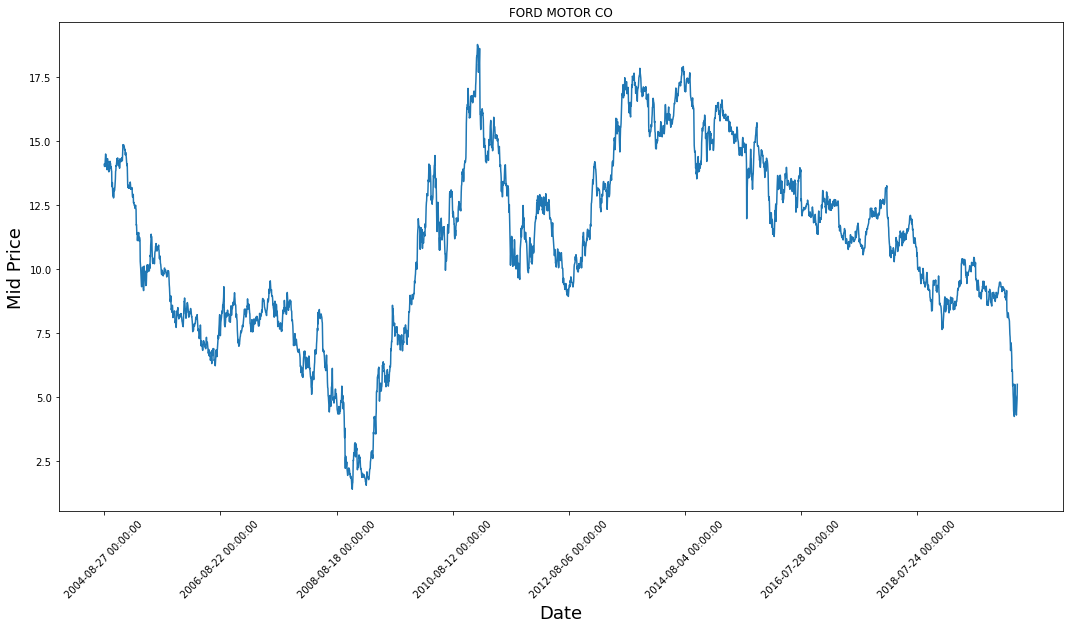

In [ ]:
n = Df1_comp.shape[0]
p = Df1_comp.shape[1]
plt.figure(figsize = (18,9))
plt.plot(range(Df1_comp.shape[0]),Df1_comp['Mid'])
plt.xticks(range(0,Df1_comp.shape[0],500),Df1_comp['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.title(Company_select)
plt.show()

In [ ]:
analyst_call.shape

(1670, 2)

## Step 1
First let's start with simple linear regression 

In [ ]:
def prepare_data(df,forecast_col,forecast_out,test_size):
   
    label = df[forecast_col].shift(-forecast_out);
    X = np.array(df[[forecast_col]]); 
    X = preprocessing.scale(X) 
    X_lately = X[-forecast_out:] 
    X = X[:-forecast_out] 
    label.dropna(inplace=True); 
    y = np.array(label) 
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=test_size) #cross validation 

    response = [X_train,X_test , Y_train, Y_test , X_lately];
    return response;

The test score is:  0.8806021036959303


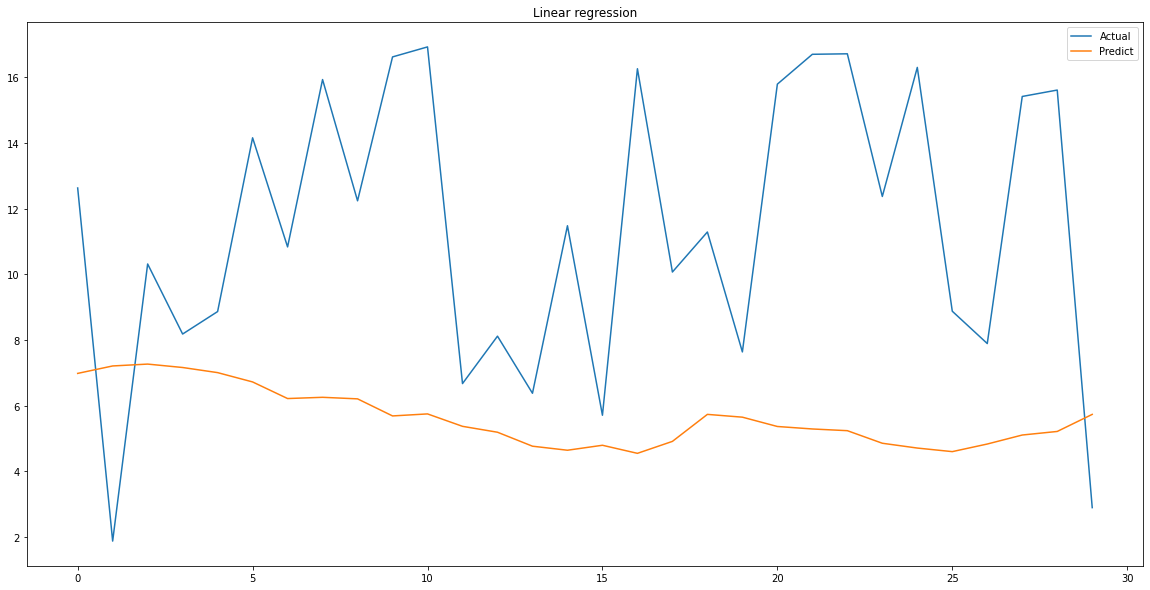

In [ ]:
forecast_col = 'Mid'
forecast_out = 30
test_size = 0.2; 

X_train, X_test, Y_train, Y_test , X_lately =prepare_data(Df1_comp,forecast_col,forecast_out,test_size); 

learner = linear_model.LinearRegression(); 

learner.fit(X_train,Y_train); 
score=learner.score(X_test,Y_test);

forecast= learner.predict(X_lately); 

response={};
response['test_score']=score; 
response['forecast_set']=forecast;
print("The test score is: ",format(score))

fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.plot(Y_test[:forecast_out],label='Actual')
ax.plot(forecast,label='Predict')
plt.title('Linear regression')
ax.legend()


# Step 2
## standard approaches: 

### a. standard average

In [ ]:
train_start = 0
train_end=3850
test_start = train_end
test_end = n
data_train = Df1_comp.iloc[np.arange(train_start, train_end), :]
data_test = Df1_comp.iloc[np.arange(test_start, test_end), :]

data_train=data_train.reset_index()
data_test=data_test.reset_index()
data_test=data_test.drop(['index'], axis=1)
data_train=data_train.drop(['index'], axis=1)
scaler = MinMaxScaler()
training_val=scaler.fit_transform(data_train['Mid'].to_numpy().reshape(-1,1))
test_val=scaler.transform(data_test['Mid'].to_numpy().reshape(-1,1))


In [ ]:
window_size = 75
N = training_val.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = Df1_comp.index.values[pred_idx]

    std_avg_predictions.append(np.mean(training_val[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-training_val[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))


MSE error for standard averaging: 0.00205


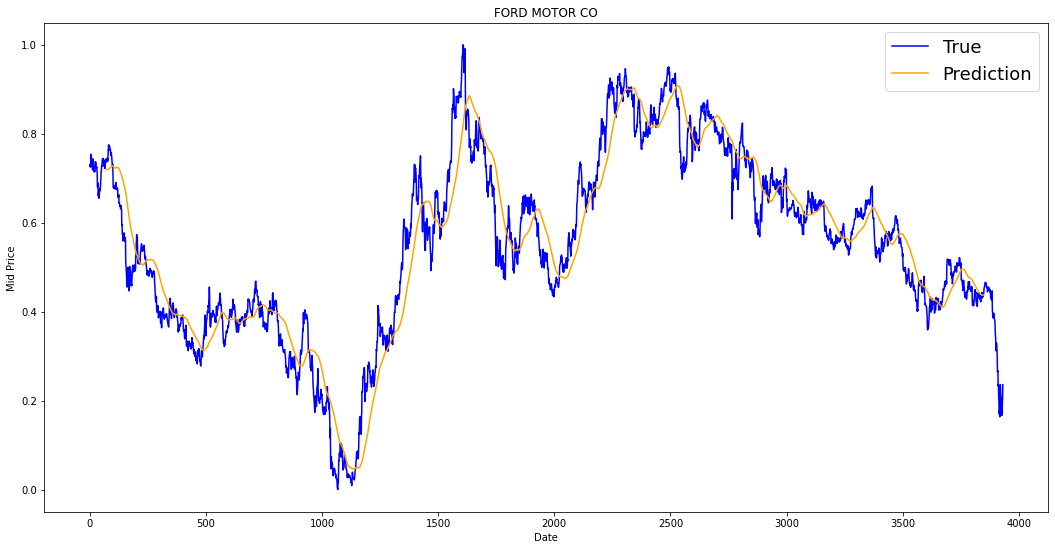

In [ ]:
all_mid_data = np.concatenate([training_val,test_val],axis=0)
plt.figure(figsize = (18,9))
plt.plot(range(Df1_comp.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.title(Company_select)
plt.show()

### b. exponential  moving averagve

In [ ]:
window_size = 100
N = training_val.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*training_val[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-training_val[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 0.00012


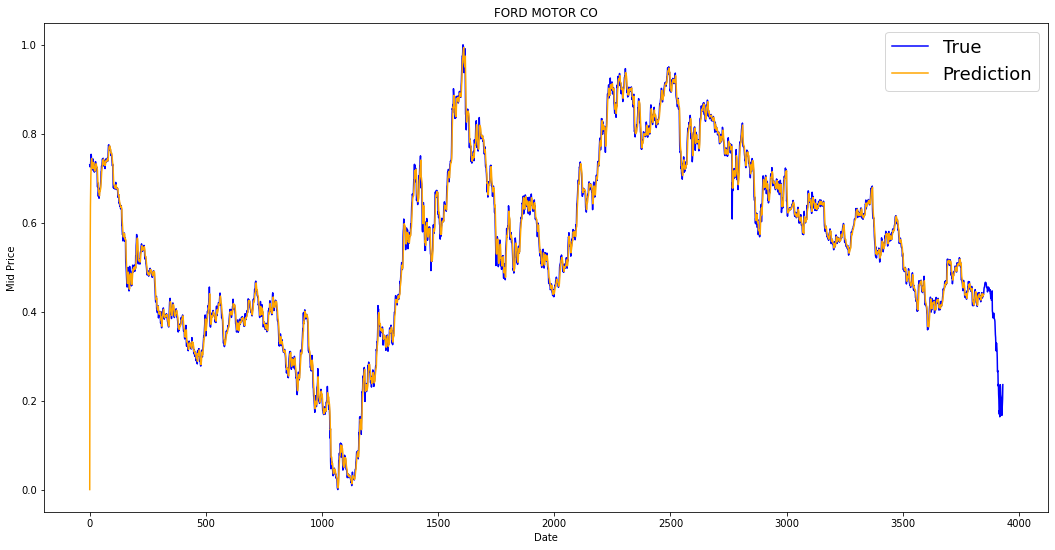

In [ ]:
all_mid_data = np.concatenate([training_val,test_val],axis=0)
plt.figure(figsize = (18,9))
plt.plot(range(Df1_comp.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.title(Company_select)
plt.show()

# Step 3

Vanilla LSTM 

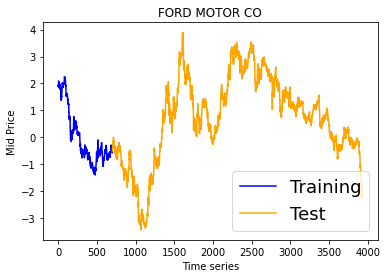

In [ ]:
train_start = 0
# train_end = int(np.floor(train_split_val*n))
train_end=700
test_start = train_end
test_end = n
data_train = Df1_comp.iloc[np.arange(train_start, train_end), :]
data_test = Df1_comp.iloc[np.arange(test_start, test_end), :]

data_train=data_train.reset_index()
data_test=data_test.reset_index()
data_test=data_test.drop(['index'], axis=1)
data_train=data_train.drop(['index'], axis=1)
scaler = StandardScaler()#MinMaxScaler()
training_val=scaler.fit_transform(data_train['Mid'].to_numpy().reshape(-1,1))
test_val=scaler.transform(data_test['Mid'].to_numpy().reshape(-1,1))
plt.plot(range(0,training_val.shape[0]),training_val,color='b',label='Training')
plt.plot(range(training_val.shape[0],training_val.shape[0]+test_val.shape[0]),test_val,color='orange',label='Test')
plt.xlabel('Time series')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.title(Company_select)
plt.show()

training_set=data_train['Mid'].to_numpy().reshape(-1,1)
sc = StandardScaler()#MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
ndays=50
ac_train = analyst_call[np.arange(train_start+ndays, train_end),1]
ac_test = analyst_call[np.arange(test_start, test_end),1]
X_train = []
y_train = []
for i in range(ndays, train_end):
    X_train.append(training_set_scaled[i-ndays:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# X_train.shape
# ac_train.shape

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=60,return_sequences=True,input_shape=(X_train.shape[1], 1)))
# model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=400,batch_size=128,verbose=0)

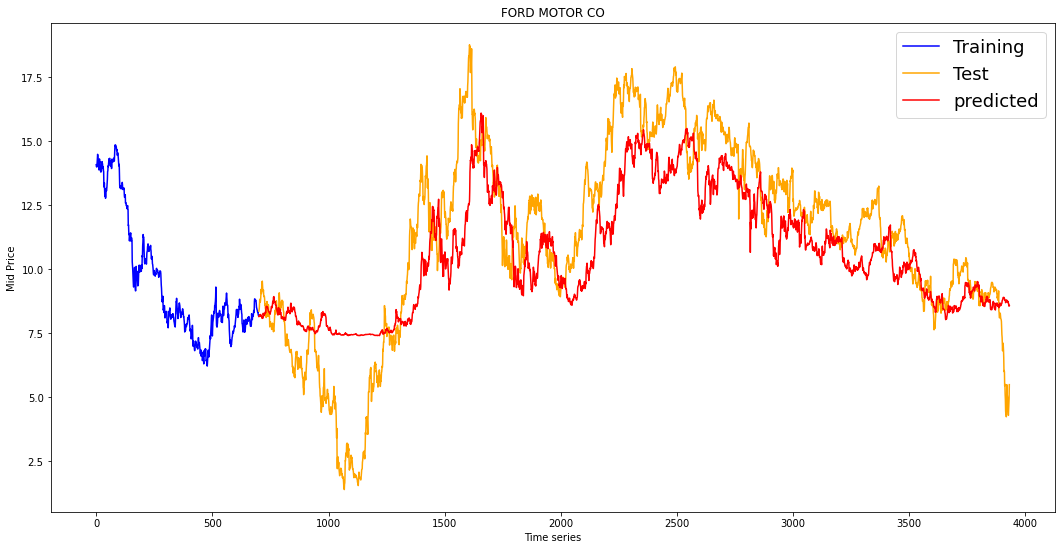

ValueError: ignored

In [ ]:
dataset_total = pd.concat((data_train['Mid'], data_test['Mid']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(data_test) - ndays:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(ndays, n-train_end+ndays):
    X_test.append(inputs[i-ndays:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.figure(figsize = (18,9))
plt.plot(range(0,training_val.shape[0]),data_train['Mid'].to_numpy().reshape(-1,1),color='b',label='Training')
plt.plot(range(training_val.shape[0],training_val.shape[0]+test_val.shape[0]),data_test['Mid'].to_numpy().reshape(-1,1),color='orange',label='Test')
plt.plot(range(training_val.shape[0],training_val.shape[0]+predicted_stock_price.shape[0]),predicted_stock_price[:,0,0],color='red',label='predicted')
plt.xlabel('Time series')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.title(Company_select)
plt.show()
mse = ((predicted_stock_price - data_test['Mid'].to_numpy().reshape(-1,1))**2).mean(axis=0)
print('MSE: {}'.format(mse))

# Step 4
Multi-stack LSTM

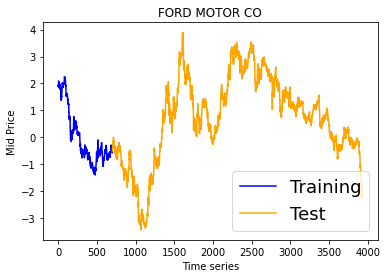

In [ ]:
train_start = 0
# train_end = int(np.floor(train_split_val*n))
train_end=700
test_start = train_end
test_end = n
data_train = Df1_comp.iloc[np.arange(train_start, train_end), :]
data_test = Df1_comp.iloc[np.arange(test_start, test_end), :]

data_train=data_train.reset_index()
data_test=data_test.reset_index()
data_test=data_test.drop(['index'], axis=1)
data_train=data_train.drop(['index'], axis=1)
scaler = StandardScaler()#MinMaxScaler()
training_val=scaler.fit_transform(data_train['Mid'].to_numpy().reshape(-1,1))
test_val=scaler.transform(data_test['Mid'].to_numpy().reshape(-1,1))
plt.plot(range(0,training_val.shape[0]),training_val,color='b',label='Training')
plt.plot(range(training_val.shape[0],training_val.shape[0]+test_val.shape[0]),test_val,color='orange',label='Test')
plt.xlabel('Time series')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.title(Company_select)
plt.show()

In [ ]:

training_set=data_train['Mid'].to_numpy().reshape(-1,1)
sc = StandardScaler()#MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
ndays=50
ac_train = analyst_call[np.arange(train_start+ndays, train_end),1]
ac_test = analyst_call[np.arange(test_start, test_end),1]
X_train = []
y_train = []
for i in range(ndays, train_end):
    X_train.append(training_set_scaled[i-ndays:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# X_train.shape
# ac_train.shape

# Model 1 

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=60,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(units=60,return_sequences=True))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(units=60,return_sequences=True))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(units=60))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=400,batch_size=128)

Epoch 1/400
6/6 [==============================] - 0s 12ms/step - loss: 0.5395
Epoch 2/400
6/6 [==============================] - 0s 12ms/step - loss: 0.1361
Epoch 3/400
6/6 [==============================] - 0s 13ms/step - loss: 0.1460
Epoch 4/400
6/6 [==============================] - 0s 11ms/step - loss: 0.0897
Epoch 5/400
6/6 [==============================] - 0s 11ms/step - loss: 0.0734
Epoch 6/400
6/6 [==============================] - 0s 11ms/step - loss: 0.0745
Epoch 7/400
6/6 [==============================] - 0s 11ms/step - loss: 0.0704
Epoch 8/400
6/6 [==============================] - 0s 10ms/step - loss: 0.0632
Epoch 9/400
6/6 [==============================] - 0s 11ms/step - loss: 0.0564
Epoch 10/400
6/6 [==============================] - 0s 10ms/step - loss: 0.0596
Epoch 11/400
6/6 [==============================] - 0s 10ms/step - loss: 0.0586
Epoch 12/400
6/6 [==============================] - 0s 10ms/step - loss: 0.0509
Epoch 13/400
6/6 [==============================]

In [ ]:
dataset_total = pd.concat((data_train['Mid'], data_test['Mid']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(data_test) - ndays:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(ndays, n-train_end+ndays):
    X_test.append(inputs[i-ndays:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

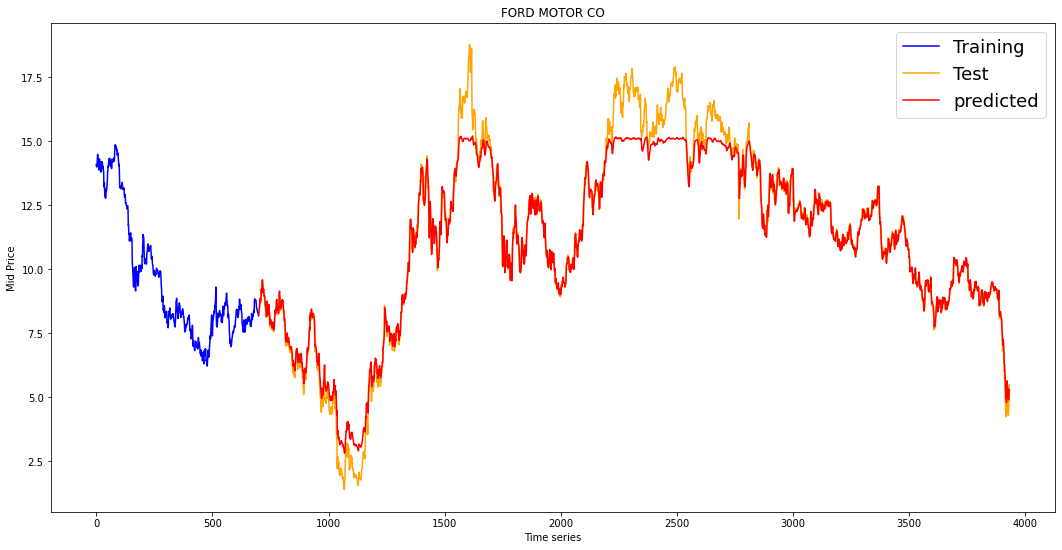

MSE: [0.48798291]


In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(0,training_val.shape[0]),data_train['Mid'].to_numpy().reshape(-1,1),color='b',label='Training')
plt.plot(range(training_val.shape[0],training_val.shape[0]+test_val.shape[0]),data_test['Mid'].to_numpy().reshape(-1,1),color='orange',label='Test')
plt.plot(range(training_val.shape[0],training_val.shape[0]+predicted_stock_price.shape[0]),predicted_stock_price,color='red',label='predicted')
plt.xlabel('Time series')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.title(Company_select)
plt.show()
mse = ((predicted_stock_price - data_test['Mid'].to_numpy().reshape(-1,1))**2).mean(axis=0)
print('MSE: {}'.format(mse))

# Model 2
## LSTM with analyst call 

In [ ]:
from keras.models import Model
from keras.layers import Input, LSTM, Dropout, Dense, concatenate
from keras import optimizers

lstm_input = Input(shape=(X_train.shape[1], 1,), name='lstm_input')
dense_input = Input(shape=(1,), name='tech_input')

x = LSTM(units=120,return_sequences=True)(lstm_input)
x = Dropout(0.3)(x)
x = LSTM(units=120,return_sequences=True)(x)
x = Dropout(0.3)(x)
x = LSTM(units=120,return_sequences=True)(x)
x = Dropout(0.3)(x)
x = LSTM(units=60)(x)
x = Dropout(0.3)(x)

y = Dense(20, activation="relu", name='tech_dense_0')(dense_input)
y = Dropout(0.3, name='tech_dropout_0')(y)

combined = concatenate([x,y])
z = Dense(64, activation="sigmoid", name='dense_pooling')(combined)
z = Dense(1, activation="linear", name='dense_out')(z)
adam = optimizers.Adam(lr=5e-4,decay=1e-3)
model = Model(inputs=[lstm_input, dense_input], outputs=z)
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit([X_train,ac_train],y_train,epochs=250,batch_size=512)

Epoch 1/250
650/650 [==============================] - 2s 3ms/step - loss: 0.7927
Epoch 2/250
650/650 [==============================] - 1s 1ms/step - loss: 0.6087
Epoch 3/250
650/650 [==============================] - 1s 970us/step - loss: 0.3946
Epoch 4/250
650/650 [==============================] - 1s 1ms/step - loss: 0.3085
Epoch 5/250
650/650 [==============================] - 1s 1ms/step - loss: 0.2993
Epoch 6/250
650/650 [==============================] - 1s 1ms/step - loss: 0.2789
Epoch 7/250
650/650 [==============================] - 1s 1ms/step - loss: 0.2371
Epoch 8/250
650/650 [==============================] - 1s 1ms/step - loss: 0.2090
Epoch 9/250
650/650 [==============================] - 1s 1ms/step - loss: 0.2093
Epoch 10/250
650/650 [==============================] - 1s 1ms/step - loss: 0.1755
Epoch 11/250
650/650 [==============================] - 1s 1ms/step - loss: 0.1663
Epoch 12/250
650/650 [==============================] - 1s 966us/step - loss: 0.1627
Epoch 13/

In [ ]:
dataset_total = pd.concat((data_train['Mid'], data_test['Mid']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(data_test) - ndays:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(ndays, n-train_end+ndays):
    X_test.append(inputs[i-ndays:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict([X_test,ac_test])
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

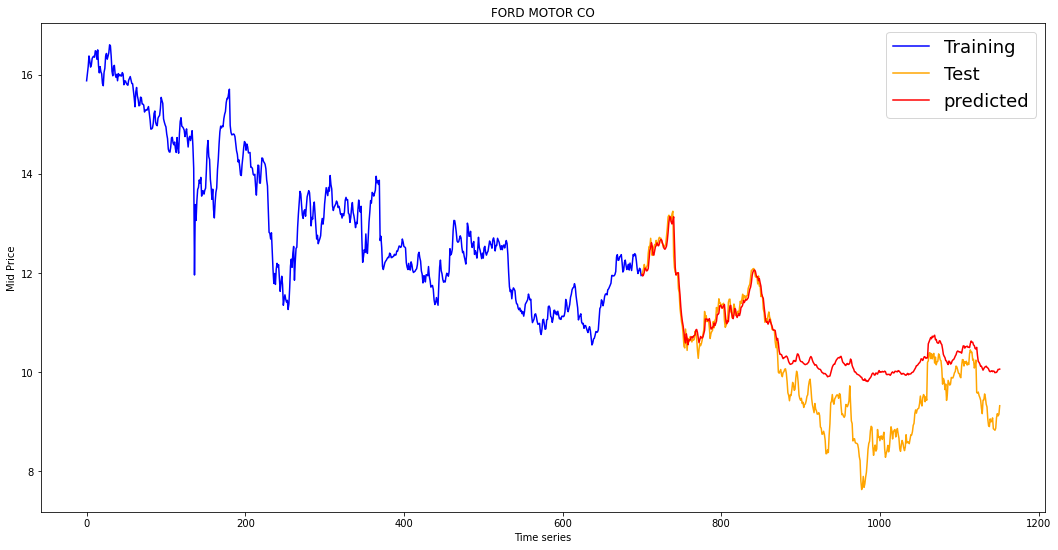

MSE: [0.62273523]


(452, 1)

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(0,training_val.shape[0]),data_train['Mid'].to_numpy().reshape(-1,1),color='b',label='Training')
plt.plot(range(training_val.shape[0],training_val.shape[0]+test_val.shape[0]),data_test['Mid'].to_numpy().reshape(-1,1),color='orange',label='Test')
plt.plot(range(training_val.shape[0],training_val.shape[0]+predicted_stock_price.shape[0]),predicted_stock_price,color='red',label='predicted')
plt.xlabel('Time series')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.title(Company_select)
plt.show()
mse = ((predicted_stock_price - data_test['Mid'].to_numpy().reshape(-1,1))**2).mean(axis=0)
print('MSE: {}'.format(mse))
predicted_stock_price.shape

In [ ]:
X_test = np.zeros((1,ndays,1))
dataset_total = inputs[0:ndays,0]
psp_arr = np.zeros((len(data_test),1))

for i in range(len(data_test)):
    X_test[0,:,0] = dataset_total[i:ndays+i]
    predicted_stock_price = model.predict([X_test,np.array([ac_test.reshape(-1,1)[i]])])
    psp_arr[i] = sc.inverse_transform(predicted_stock_price)
    dataset_total = np.append(dataset_total,predicted_stock_price)
data_test['Mid'].to_numpy().reshape(-1,1).shape 


(452, 1)

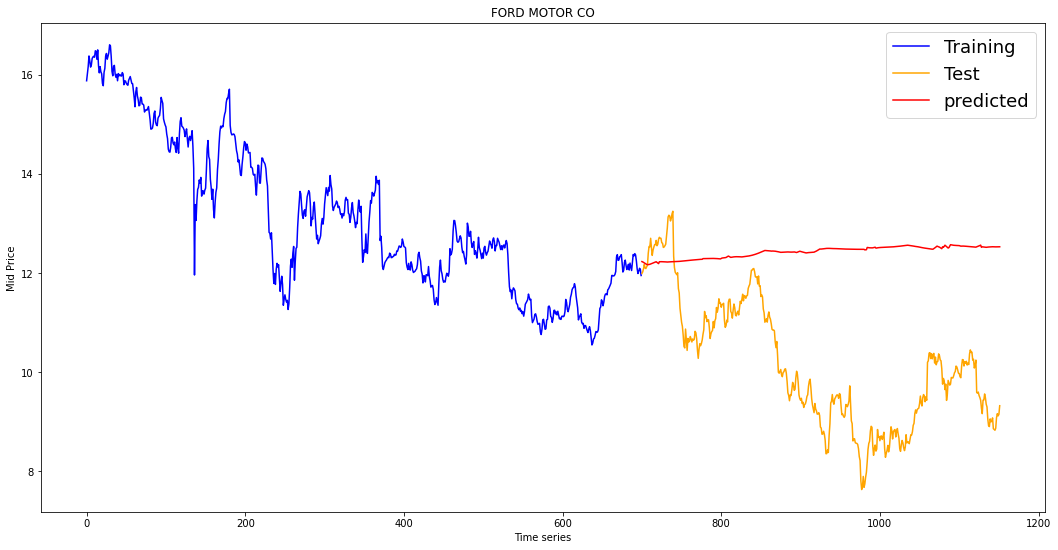

MSE: [7.08463241]


In [ ]:

plt.figure(figsize = (18,9))
plt.plot(range(0,training_val.shape[0]),data_train['Mid'].to_numpy().reshape(-1,1),color='b',label='Training')
plt.plot(range(training_val.shape[0],training_val.shape[0]+test_val.shape[0]),data_test['Mid'].to_numpy().reshape(-1,1),color='orange',label='Test')
plt.plot(range(training_val.shape[0],training_val.shape[0]+psp_arr.shape[0]),psp_arr,color='red',label='predicted')
plt.xlabel('Time series')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.title(Company_select)
plt.show()
mse = ((psp_arr - data_test['Mid'].to_numpy().reshape(-1,1))**2).mean(axis=0)
print('MSE: {}'.format(mse))


# Model 3
## LSTM with analyst call and attention

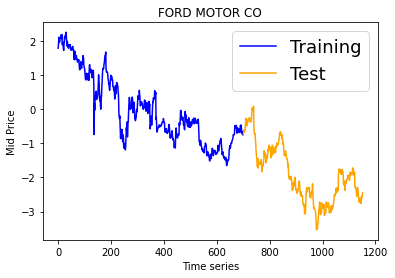

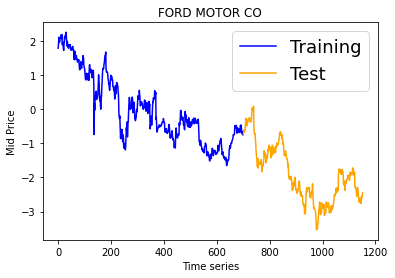

Epoch 1/250
695/695 [==============================] - 2s 2ms/step - loss: 1.5520
Epoch 2/250
695/695 [==============================] - 0s 144us/step - loss: 1.3815
Epoch 3/250
695/695 [==============================] - 0s 123us/step - loss: 1.2443
Epoch 4/250
695/695 [==============================] - 0s 129us/step - loss: 1.0731
Epoch 5/250
695/695 [==============================] - 0s 128us/step - loss: 0.8894
Epoch 6/250
695/695 [==============================] - 0s 127us/step - loss: 0.6239
Epoch 7/250
695/695 [==============================] - 0s 142us/step - loss: 0.3835
Epoch 8/250
695/695 [==============================] - 0s 151us/step - loss: 0.3149
Epoch 9/250
695/695 [==============================] - 0s 176us/step - loss: 0.3756
Epoch 10/250
695/695 [==============================] - 0s 178us/step - loss: 0.3186
Epoch 11/250
695/695 [==============================] - 0s 146us/step - loss: 0.2109
Epoch 12/250
695/695 [==============================] - 0s 151us/step - loss

In [ ]:
from keras.models import Model
from keras.layers import Input, LSTM, Dropout, Dense, concatenate
from keras import optimizers
import keras
from keras_self_attention import SeqSelfAttention


train_start = 0
# train_end = int(np.floor(train_split_val*n))
train_end=700
test_start = train_end
test_end = n
data_train = Df1_comp.iloc[np.arange(train_start, train_end), :]
data_test = Df1_comp.iloc[np.arange(test_start, test_end), :]

data_train=data_train.reset_index()
data_test=data_test.reset_index()
data_test=data_test.drop(['index'], axis=1)
data_train=data_train.drop(['index'], axis=1)
scaler = StandardScaler()#MinMaxScaler()
training_val=scaler.fit_transform(data_train['Mid'].to_numpy().reshape(-1,1))
test_val=scaler.transform(data_test['Mid'].to_numpy().reshape(-1,1))
plt.plot(range(0,training_val.shape[0]),training_val,color='b',label='Training')
plt.plot(range(training_val.shape[0],training_val.shape[0]+test_val.shape[0]),test_val,color='orange',label='Test')
plt.xlabel('Time series')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.title(Company_select)
plt.show()



training_set=data_train['Mid'].to_numpy().reshape(-1,1)
sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)
mselist=[]
ndayslist=[5,15,25,40,50,60]
for ndays in ndayslist:
  ac_train = analyst_call[np.arange(train_start+ndays, train_end),1]
  ac_test = analyst_call[np.arange(test_start, test_end),1]
  X_train = []
  y_train = []
  for i in range(ndays, train_end):
      X_train.append(training_set_scaled[i-ndays:i, 0])
      y_train.append(training_set_scaled[i, 0])
  X_train, y_train = np.array(X_train), np.array(y_train)
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

  lstm_input = Input(shape=(X_train.shape[1], 1,), name='lstm_input')
  dense_input = Input(shape=(1,), name='tech_input')

  x = LSTM(units=120,return_sequences=True)(lstm_input)
  x =  SeqSelfAttention(attention_activation='relu')(x)
  x = Dropout(0.3)(x)
  x = LSTM(units=120,return_sequences=True)(x)
  # x =  SeqSelfAttention(attention_activation='relu')(x)
  x = Dropout(0.3)(x)

  x = LSTM(units=120,return_sequences=True)(x)
  # x =  SeqSelfAttention(attention_activation='relu')(x)
  x = Dropout(0.3)(x)

  x = LSTM(units=60)(x)
  x = Dropout(0.3)(x)

  y = Dense(20, activation="relu", name='tech_dense_0')(dense_input)
  y = Dropout(0.3, name='tech_dropout_0')(y)

  combined = concatenate([x,y])
  z = Dense(64, activation="sigmoid", name='dense_pooling')(combined)
  z = Dense(1, activation="linear", name='dense_out')(z)
  adam = optimizers.Adam(lr=5e-4,decay=1e-3)
  model = Model(inputs=[lstm_input, dense_input], outputs=z)
  model.compile(optimizer='adam',loss='mean_squared_error')
  history=model.fit([X_train,ac_train],y_train,epochs=250,batch_size=512)

  dataset_total = pd.concat((data_train['Mid'], data_test['Mid']), axis = 0)
  inputs = dataset_total[len(dataset_total) - len(data_test) - ndays:].values
  inputs = inputs.reshape(-1,1)
  inputs = sc.transform(inputs)
  X_test = []
  for i in range(ndays, n-train_end+ndays):
      X_test.append(inputs[i-ndays:i, 0])
  X_test = np.array(X_test)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
  predicted_stock_price = model.predict([X_test,ac_test])
  predicted_stock_price = sc.inverse_transform(predicted_stock_price)
  mse = ((predicted_stock_price - data_test['Mid'].to_numpy().reshape(-1,1))**2).mean(axis=0)
  mselist.append(mse)

In [ ]:
mselist

[array([0.48690562]),
 array([0.74317352]),
 array([0.78590663]),
 array([1.44639337]),
 array([1.34731981]),
 array([1.36468616])]

# TEST 

In [ ]:
!pip install keras-self-attention
import keras
import tensorflow as tf
from keras_self_attention import SeqSelfAttention
from keras.models import Model
from keras.layers import Input, LSTM, Dropout, Dense, concatenate, Bidirectional
from keras import optimizers


In [ ]:
train_start = 0
train_end=700
ndays=50


test_start = train_end
test_end = n
data_train = Df1_comp.iloc[np.arange(train_start, train_end), :]
data_test = Df1_comp.iloc[np.arange(test_start, test_end), :]

data_train=data_train.reset_index()
data_test=data_test.reset_index()
data_test=data_test.drop(['index'], axis=1)
data_train=data_train.drop(['index'], axis=1)
scaler = StandardScaler()#MinMaxScaler()
training_val=scaler.fit_transform(data_train['Mid'].to_numpy().reshape(-1,1))
test_val=scaler.transform(data_test['Mid'].to_numpy().reshape(-1,1))


training_set=data_train['Mid'].to_numpy().reshape(-1,1)
test_set=data_test['Mid'].to_numpy().reshape(-1,1)

sc = StandardScaler()#MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.transform(test_set)

ac_train = analyst_call[np.arange(train_start+ndays, train_end),1]
ac_test = analyst_call[np.arange(test_start, test_end),1]
X_train = []
y_train = []
for i in range(ndays, train_end):
    X_train.append(training_set_scaled[i-ndays:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [ ]:

lstm_input = Input(shape=(X_train.shape[1], 1,), name='lstm_input')
dense_input = Input(shape=(1,), name='tech_input')

x = LSTM(units=120,return_sequences=True)(lstm_input)
x = Dropout(0.3)(x)
x=SeqSelfAttention(attention_activation='sigmoid')(x)
x = LSTM(units=120,return_sequences=True)(x)
x = Dropout(0.3)(x)
x = LSTM(units=120,return_sequences=True)(x)
x = Dropout(0.3)(x)
x = LSTM(units=60)(x)
x = Dropout(0.3)(x)

y = Dense(20, activation="relu", name='tech_dense_0')(dense_input)
y = Dropout(0.3, name='tech_dropout_0')(y)

combined = concatenate([x,y])
z = Dense(64, activation="sigmoid", name='dense_pooling')(combined)
z = Dense(1, activation="linear", name='dense_out')(z)
adam = optimizers.Adam(lr=5e-4,decay=1e-3)
model = Model(inputs=[lstm_input, dense_input], outputs=z)
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit([X_train,ac_train],y_train,epochs=250,batch_size=512)

Epoch 1/250
650/650 [==============================] - 2s 3ms/step - loss: 1.9336
Epoch 2/250
650/650 [==============================] - 1s 982us/step - loss: 1.4819
Epoch 3/250
650/650 [==============================] - 1s 1ms/step - loss: 0.8994
Epoch 4/250
650/650 [==============================] - 1s 1ms/step - loss: 0.5228
Epoch 5/250
650/650 [==============================] - 1s 1ms/step - loss: 0.3616
Epoch 6/250
650/650 [==============================] - 1s 1ms/step - loss: 0.3544
Epoch 7/250
650/650 [==============================] - 1s 1ms/step - loss: 0.4092
Epoch 8/250
650/650 [==============================] - 1s 1ms/step - loss: 0.3913
Epoch 9/250
650/650 [==============================] - 1s 1ms/step - loss: 0.3574
Epoch 10/250
650/650 [==============================] - 1s 1ms/step - loss: 0.3372
Epoch 11/250
650/650 [==============================] - 1s 1ms/step - loss: 0.3092
Epoch 12/250
650/650 [==============================] - 1s 1ms/step - loss: 0.3088
Epoch 13/25

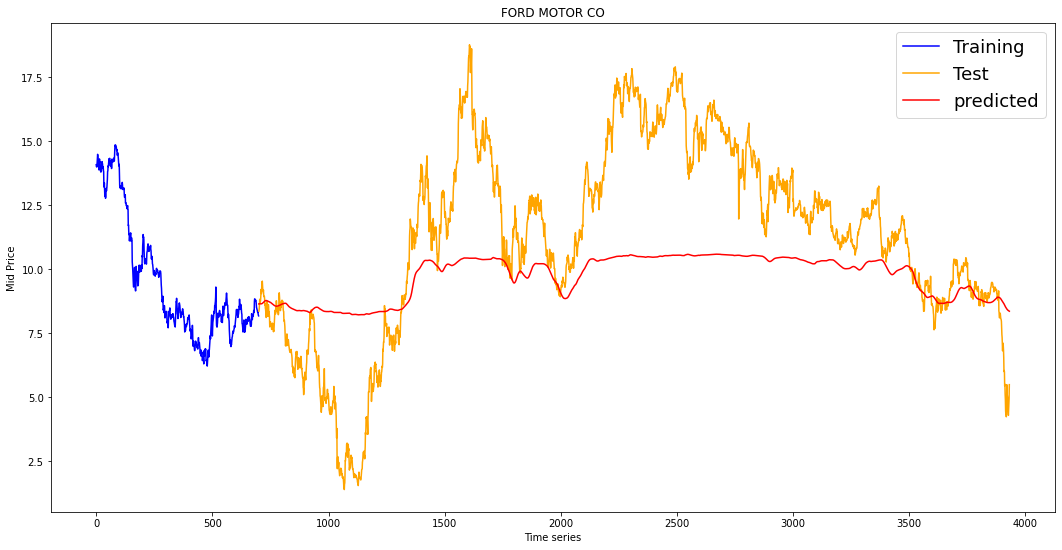

MSE: [11.08762673]


In [ ]:
dataset_total = pd.concat((data_train['Mid'], data_test['Mid']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(data_test) - ndays:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(ndays, n-train_end+ndays):
    X_test.append(inputs[i-ndays:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict([X_test,ac_test])
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.figure(figsize = (18,9))
plt.plot(range(0,training_val.shape[0]),data_train['Mid'].to_numpy().reshape(-1,1),color='b',label='Training')
plt.plot(range(training_val.shape[0],training_val.shape[0]+test_val.shape[0]),data_test['Mid'].to_numpy().reshape(-1,1),color='orange',label='Test')
plt.plot(range(training_val.shape[0],training_val.shape[0]+predicted_stock_price.shape[0]),predicted_stock_price,color='red',label='predicted')
plt.xlabel('Time series')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.title(Company_select)
plt.show()
mse = ((predicted_stock_price - data_test['Mid'].to_numpy().reshape(-1,1))**2).mean(axis=0)
print('MSE: {}'.format(mse))

In [ ]:
lstm_input = Input(shape=(X_train.shape[1], 1,), name='lstm_input')
dense_input = Input(shape=(1,), name='tech_input')

x = Bidirectional(LSTM(units=120,return_sequences=True))(lstm_input)
x = Dropout(0.3)(x)
# x=SeqSelfAttention(attention_activation='sigmoid')(x)
x = Bidirectional(LSTM(units=120,return_sequences=True))(x)
x = Dropout(0.3)(x)
# x=SeqSelfAttention(attention_activation='sigmoid')(x)
x = Bidirectional(LSTM(units=120,return_sequences=True))(x)
x = Dropout(0.3)(x)
# x=SeqSelfAttention(attention_activation='sigmoid')(x)
x = Bidirectional(LSTM(units=60))(x)
x = Dropout(0.3)(x)


y = Dense(20, activation="relu", name='tech_dense_0')(dense_input)
y = Dropout(0.3, name='tech_dropout_0')(y)

combined = concatenate([x,y])

z = Dense(64, activation="sigmoid", name='dense_pooling')(combined)
z = Dense(1, activation="linear", name='dense_out')(z)
adam = optimizers.Adam(lr=5e-4,decay=1e-3)
model = Model(inputs=[lstm_input, dense_input], outputs=z)
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit([X_train,ac_train],y_train,epochs=250,batch_size=512)
          # ,validation_data=([X_test,ac_test],))




Epoch 1/250
650/650 [==============================] - 4s 6ms/step - loss: 0.7940
Epoch 2/250
650/650 [==============================] - 1s 2ms/step - loss: 0.4456
Epoch 3/250
650/650 [==============================] - 2s 2ms/step - loss: 0.1897
Epoch 4/250
650/650 [==============================] - 1s 2ms/step - loss: 0.2220
Epoch 5/250
650/650 [==============================] - 1s 2ms/step - loss: 0.1857
Epoch 6/250
650/650 [==============================] - 1s 2ms/step - loss: 0.1233
Epoch 7/250
650/650 [==============================] - 1s 2ms/step - loss: 0.1292
Epoch 8/250
650/650 [==============================] - 1s 2ms/step - loss: 0.1183
Epoch 9/250
650/650 [==============================] - 1s 2ms/step - loss: 0.0946
Epoch 10/250
650/650 [==============================] - 1s 2ms/step - loss: 0.0908
Epoch 11/250
650/650 [==============================] - 1s 2ms/step - loss: 0.0906
Epoch 12/250
650/650 [==============================] - 1s 2ms/step - loss: 0.0690
Epoch 13/250


(452, 1)

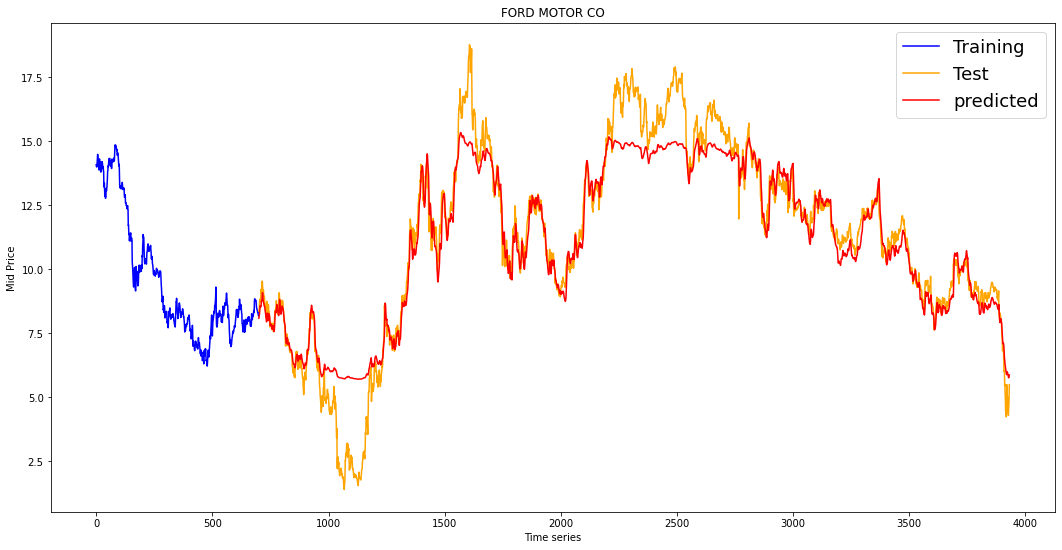

MSE: [1.15596351]


(3232, 1)

In [ ]:
dataset_total = pd.concat((data_train['Mid'], data_test['Mid']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(data_test) - ndays:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(ndays, n-train_end+ndays):
    X_test.append(inputs[i-ndays:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict([X_test,ac_test])
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.figure(figsize = (18,9))
plt.plot(range(0,training_val.shape[0]),data_train['Mid'].to_numpy().reshape(-1,1),color='b',label='Training')
plt.plot(range(training_val.shape[0],training_val.shape[0]+test_val.shape[0]),data_test['Mid'].to_numpy().reshape(-1,1),color='orange',label='Test')
plt.plot(range(training_val.shape[0],training_val.shape[0]+predicted_stock_price.shape[0]),predicted_stock_price,color='red',label='predicted')
plt.xlabel('Time series')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.title(Company_select)
plt.show()
mse = ((predicted_stock_price - data_test['Mid'].to_numpy().reshape(-1,1))**2).mean(axis=0)
print('MSE: {}'.format(mse))
predicted_stock_price.shape